In [96]:
import requests
import cv2
import numpy as np
import base64
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [97]:
img_url = 'https://images.mentalfloss.com/sites/default/files/styles/mf_image_16x9/public/kiyoshiota-gettyimages-129941726.jpg?itok=uLodGz6u&resize=600x600'

In [98]:
r = requests.get(img_url)
content = r.content
img = cv2.imdecode(np.frombuffer(content, 'uint8'), cv2.IMREAD_UNCHANGED)
img.shape

(337, 600, 3)

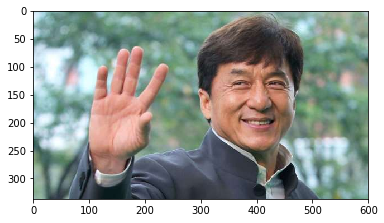

In [99]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [100]:
service_url = "http://0.0.0.0:8000/face/"
image_encoded = base64.b64encode(content)

In [101]:
res = requests.post(
    url=service_url,
    data=image_encoded,
    headers={'Content-Type': 'application/octet-stream'}
)
res.status_code

200

In [102]:
res.json()[0].keys()

dict_keys(['Rectangle', 'Headpose', 'Emotions', 'Descriptor', 'Attributes'])

In [103]:
rect = res.json()[0]['Rectangle']
rect

{'Height': 214, 'Left': 310, 'Width': 167, 'Top': 47}

In [104]:
value = res.json()[0]
dict((k,v) for k,v in value.items() if k!= "Descriptor")

{'Rectangle': {'Height': 214, 'Left': 310, 'Width': 167, 'Top': 47},
 'Headpose': {'Yaw': 15.4, 'Roll': 1.9, 'Pitch': 0.3},
 'Emotions': {'Fear': 0.0,
  'Sadness': 0.004999999888241291,
  'Anger': 0.004999999888241291,
  'Surprise': 0.003000000026077032,
  'Neutral': 0.0010000000474974513,
  'Contempt': 0.0,
  'Happiness': 0.9850000143051147,
  'Disgust': 0.0},
 'Attributes': {'Gender': 'Male', 'Age': 39}}

In [105]:
img_bboxed = img.copy()
img_bboxed = cv2.rectangle(img_bboxed,
              (rect['Left'], rect['Top'], ),
              (rect['Left'] + rect['Width'], rect['Top'] + rect['Height']),
              (0,255,0),3)

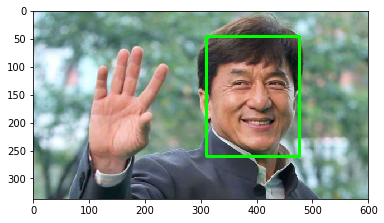

In [106]:
plt.imshow(cv2.cvtColor(img_bboxed, cv2.COLOR_BGR2RGB))